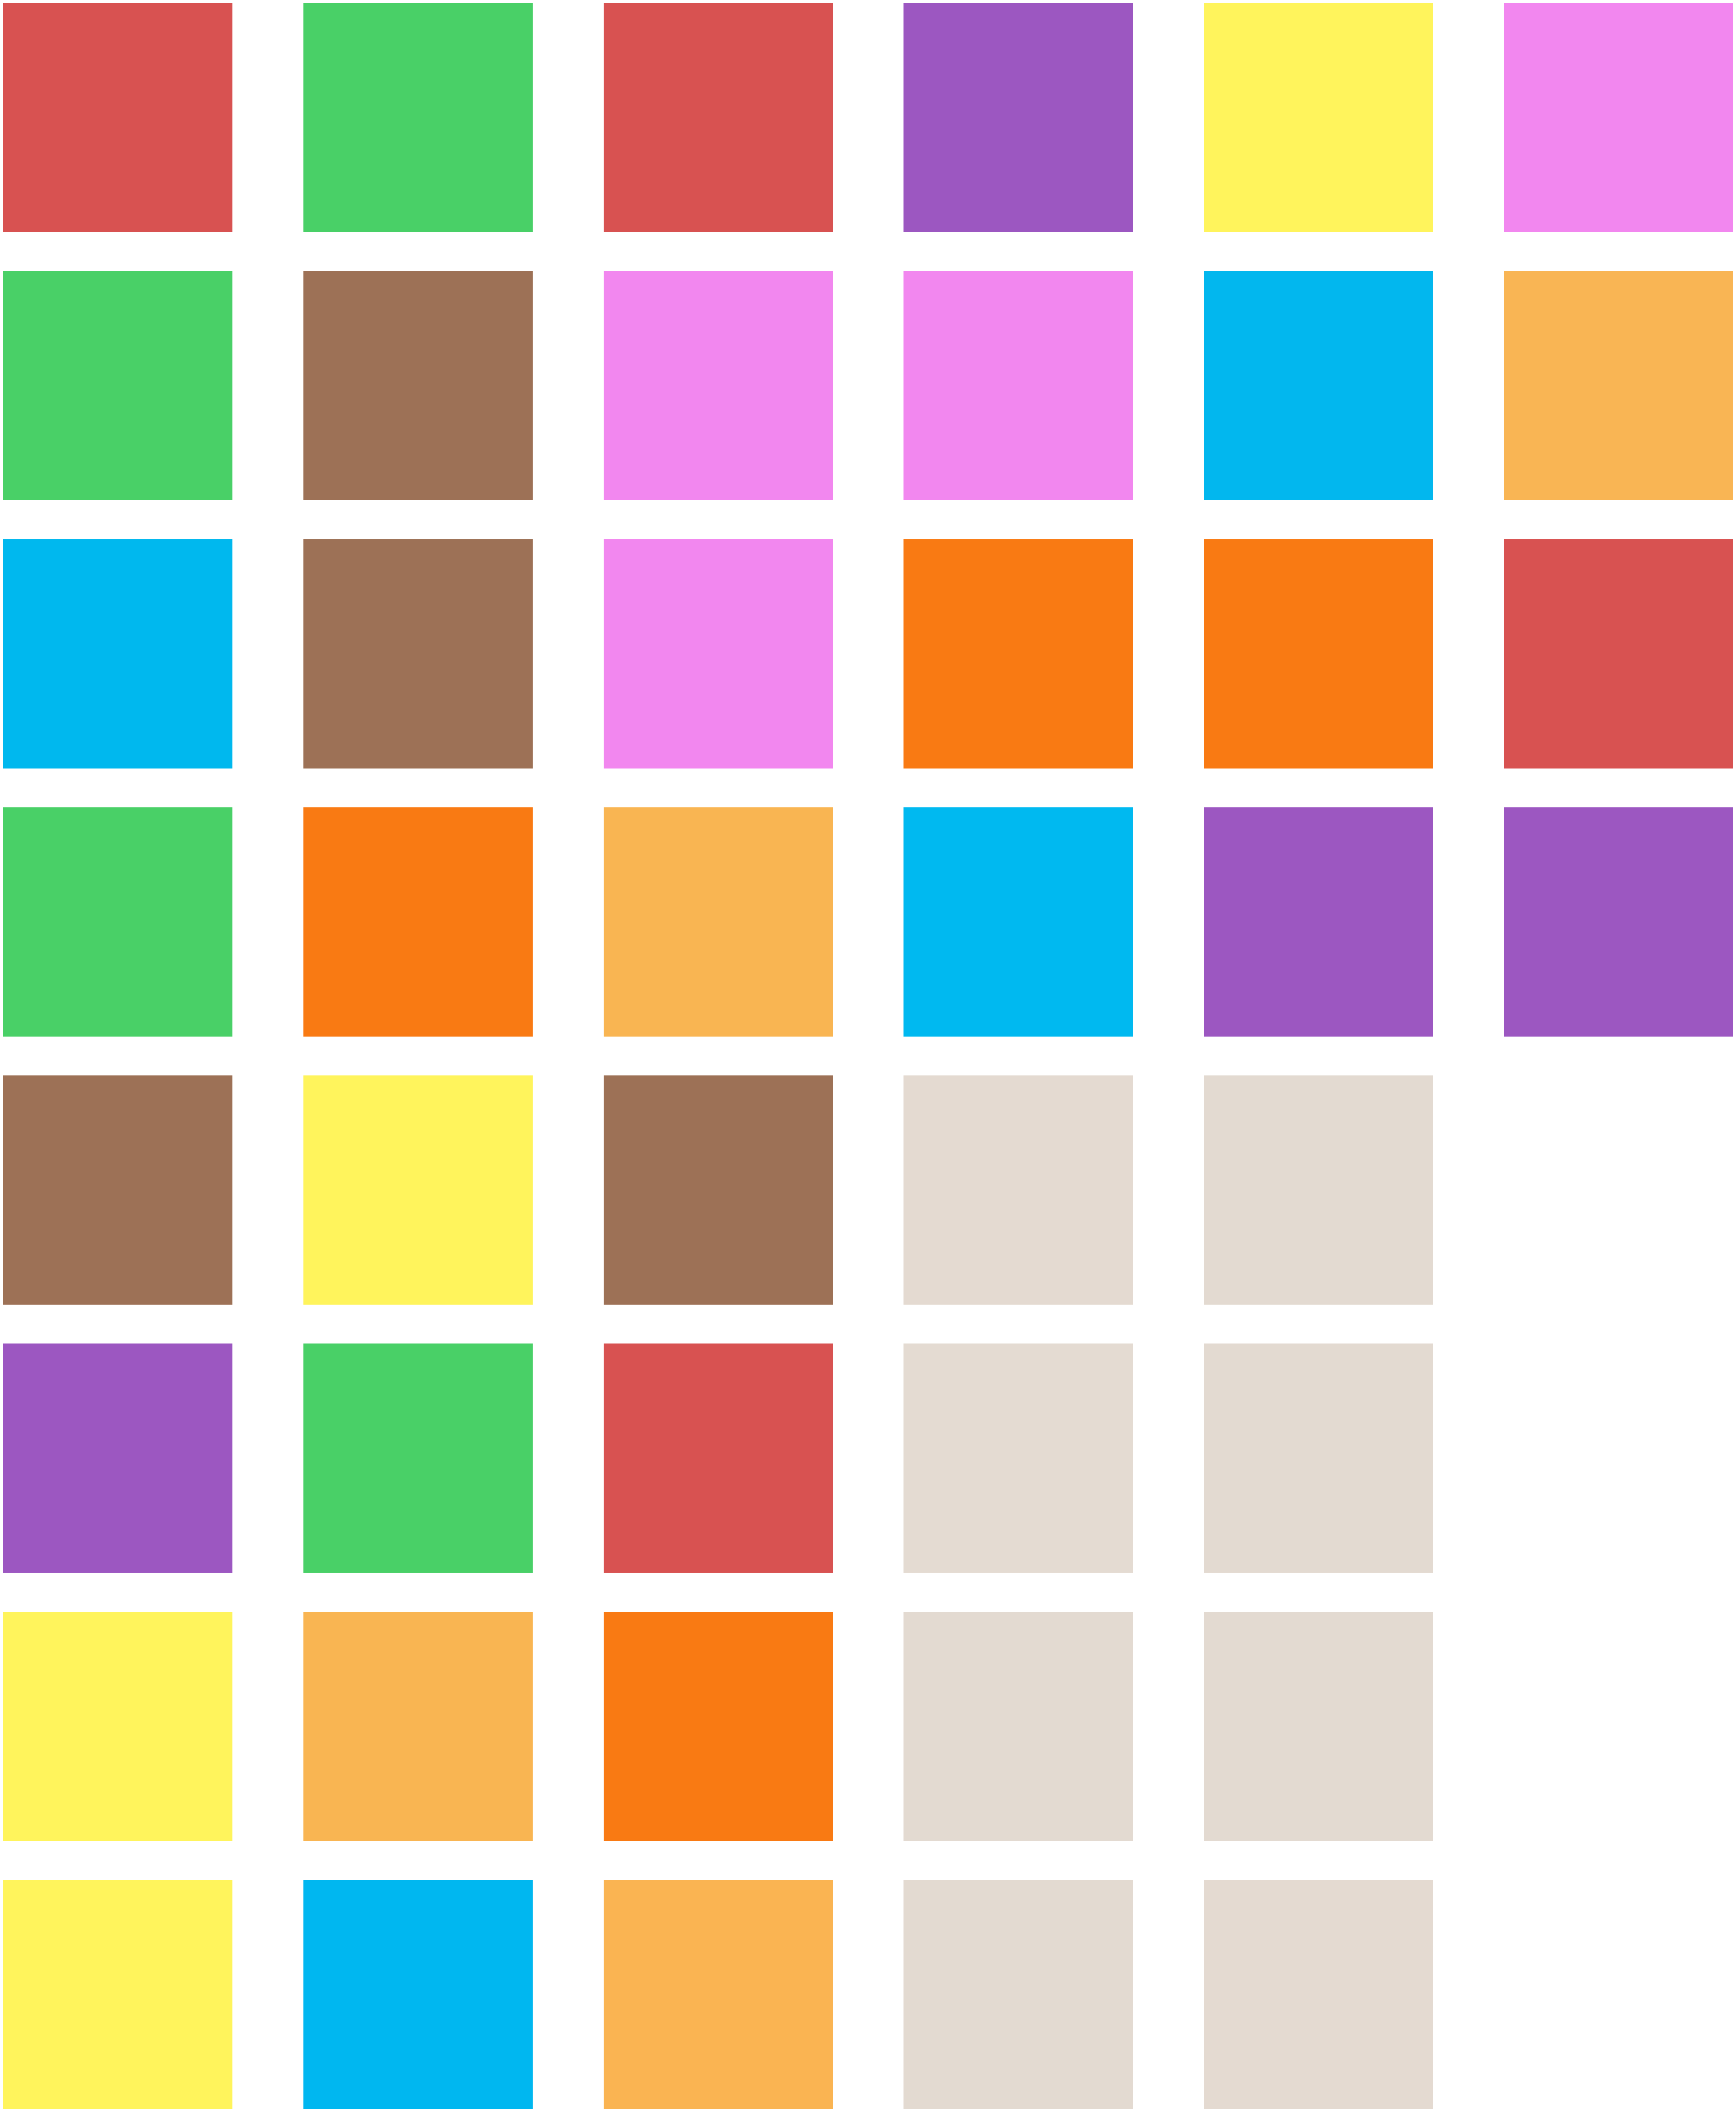

In [1]:
import cv2

from sortpuz import img_parse
from sortpuz.models.base import ImgConfig
from sortpuz.plotting import plot_game

# Game 2 = Level 470
img = cv2.imread(str("game2.jpeg"))
img_cfg = ImgConfig(tube_count=(6, 5), num_colors=4)
color_point_matrix = img_parse.get_color_map(img_cfg)

color_matrix = img_parse.get_color_matrix(color_point_matrix, img)

plot_game(color_matrix)


Agora que eu tenho as cores, posso começar a fazer a procura.<br>
Pra fazer a procura de quais movimentos que levam a resolução, preciso saber as regras dos movimentos.

Regra 1: só pode mover a célula do topo

Regra 2: uma célula só pode ser movida se há espaço para ela no tubo de destino

Regra 3: se uma célula do topo for movida, todas as células seguintes a ela no mesmo tubo de origem também serão movidas uma a uma conforme o tubo de destino tiver espaço.

Regra 4: Ganha-se o jogo se só há tubos com uma mesma cor dentro (inclusive "empty").

---

Preciso agora simular essas regras aqui dentro.

Objetos importantes: tubo, célula, cor.


In [9]:
from sortpuz.models.color import Color
from sortpuz.constants.color_constants import RED, LIGHT_BLUE, LIGHT_GREEN, BROWN


class Cell:
    def __init__(self, color: Color, tube: "Tube"):
        self.color = color
        self.is_movable = self.is_cell_movable()

    def is_cell_movable(self) -> bool:
        if self.color.name == "Empty":
            return False

        return True


class Tube:
    def __init__(self, color_list: list[Color]):
        self.cells: list[Cell] = list(map(lambda clr: Cell(clr, self), color_list))
        self.size = len(self.cells)

    def __str__(self):
        reversed_cell_colors = self.cells.copy()
        reversed_cell_colors.reverse()
        reversed_cell_colors = list(
            map(lambda cell: cell.color.name, reversed_cell_colors)
        )

        print_str = reversed_cell_colors[0]

        i = 1
        while True:
            print_str += "\n" + reversed_cell_colors[i]

            i += 1

            if i >= self.size:
                break

        return print_str

    def __repr__(self):
        return "Tube(" + repr(list(map(lambda c: c.color.name, self.cells))) + ")"


# Top of tube is BROWN, bottom is RED
color_list = [RED, LIGHT_BLUE, LIGHT_GREEN, BROWN]

tube = Tube(color_list)

print(tube)

repr(tube)

# ATENCAO: PRECISAMOS TER CERTEZA DE QUE PODEMOS USAR OS METODOS POP E APPEND PRA CELULAS.
# OU SEJA: QUANDO PRINTAR, QUAL É A CÉLULA QUE ESTA NO TOPO DO TUBO???
# PORQUE AQUI PARECE QUE É O RED. QUANDO NA VERDADE SERIA O BROWN!!
# ISSO SE A GENTE USAR APPEND E POP.
# Tem que ver, porque aí a lógica da color_list seria first in last out (FILO).
# mas a lógica do tubo seria FIFO

Brown
Light Green
Light Blue
Red


"Tube(['Red', 'Light Blue', 'Light Green', 'Brown'])"

In [2]:
lst = [1,2,3]
lst.reverse()

print(lst)


[3, 2, 1]
